### Setup

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib as mpl

import json
from pandas.io.json import json_normalize
from scipy.stats import zscore
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from adjustText import adjust_text

#### change default plotting parameters

In [8]:
#clean up default font to be more 'figure ready'
sns.set(font_scale=2)
sns.set_style('ticks')
new_rc_params = {'text.usetex': False, "svg.fonttype": 'none',
                 "axes.spines.right": False,
                 "axes.spines.top": False,
                 "axes.linewidth": 1.2,
                 "xtick.major.size": 6,
                 "xtick.major.width": 1.2,
                 "ytick.major.size": 6,
                 "ytick.major.width": 1.2,
                 "legend.frameon": False,
                 "legend.handletextpad": 0.1,
                 "font.family": 'arial', "font.size": 12,                 
}
mpl.rcParams.update(new_rc_params)

### load data

In [25]:
#serial 2p, change paths as needed
serial2p_data = pd.read_csv(r'C:\Users\Pasha\2023_acs_code_data\serial2p_data.csv')
#lightsheet data
lightsheet_data = pd.read_csv(r'C:\Users\Pasha\2023_acs_code_data\lightsheet_data.csv')
diff_data = pd.read_csv(r'C:\Users\Pasha\2023_acs_code_data\all_cfos_diff_data.csv')

### Panel G

C:\Users\Pasha\miniconda3\envs\AIBS\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Pasha\miniconda3\envs\AIBS\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

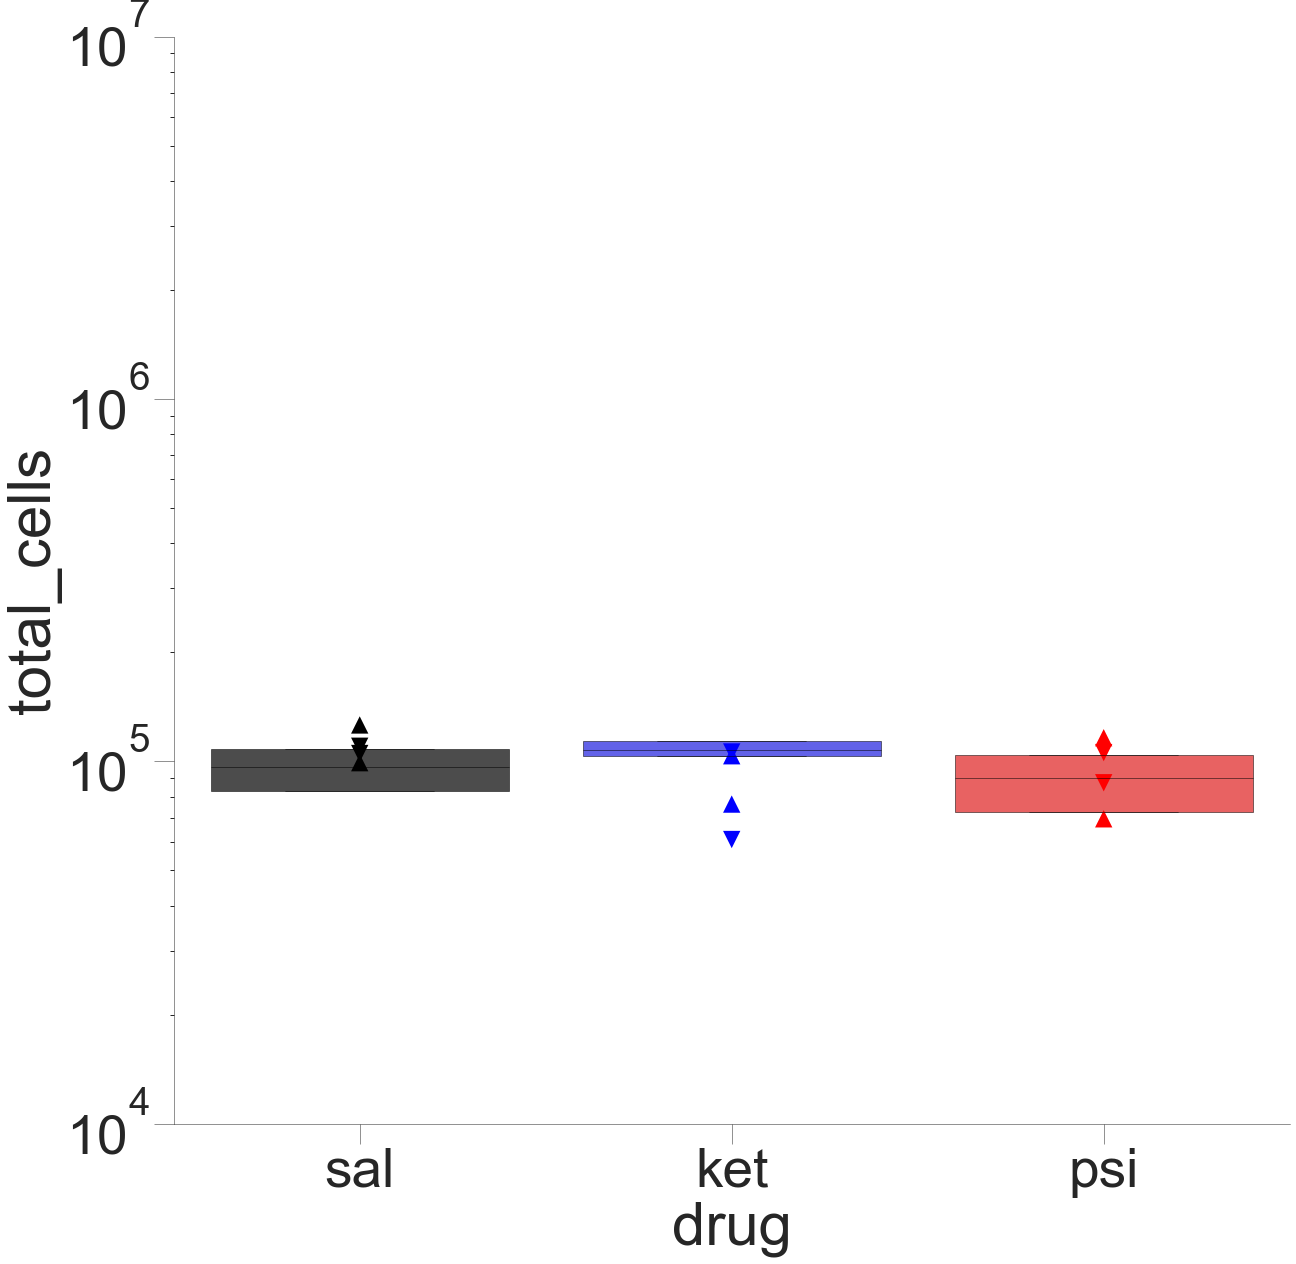

In [18]:
#first calculate total cells for drug/sex/etc
#serial2p
serial2p_whole_brain = serial2p_data.groupby(['dataset','drug','sex'])['count', 'volume_(mm^3)'].sum().reset_index()
serial2p_whole_brain.rename(columns={'count':'total_cells'}, inplace=True)
serial2p_whole_brain['density (cells/mm^3)'] = serial2p_whole_brain['total_cells'] / serial2p_whole_brain['volume_(mm^3)']
serial2p_whole_brain['method'] = 'serial2p'
#lightsheet
lightsheet_whole_brain = lightsheet_data[lightsheet_data['Region Name'] == 'Basic cell groups and regions']
lightsheet_whole_brain.drop(columns=['Region ID', 'Region Name', 'count',], inplace=True)
lightsheet_whole_brain['method'] = 'lightsheet'

#plotting
sns.set(font_scale = 5)
sns.set_style('ticks')
sns.despine()

markers={'f': 'v', 'm': '^'}
plt.figure(figsize=(20,20))
order = ['sal', 'ket', 'psi']

ax = sns.boxplot(x="drug", y="total_cells", data=serial2p_whole_brain, whis=0, dodge=False, showfliers=False, linewidth=0.5,
                 order = order, hue='drug', hue_order = order, palette=['black','blue','red'])
ax = sns.scatterplot(x="drug", y="total_cells", data=serial2p_whole_brain,
                   hue='drug', linewidth=0, style='sex', markers=markers,
                   s=300, palette=['black','blue','red'])

#lower opacity
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

    
#remove legend
plt.legend([],[], frameon=False)

#cleanup
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.xaxis.set_tick_params(length=20, width=0.5)
ax.yaxis.set_tick_params(length=20, width=0.5)
ax.set_yscale('log')
ax.set(ylim=(1e4,1e7))
sns.despine()

### Panel H

C:\Users\Pasha\miniconda3\envs\AIBS\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Pasha\miniconda3\envs\AIBS\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 432x288 with 0 Axes>

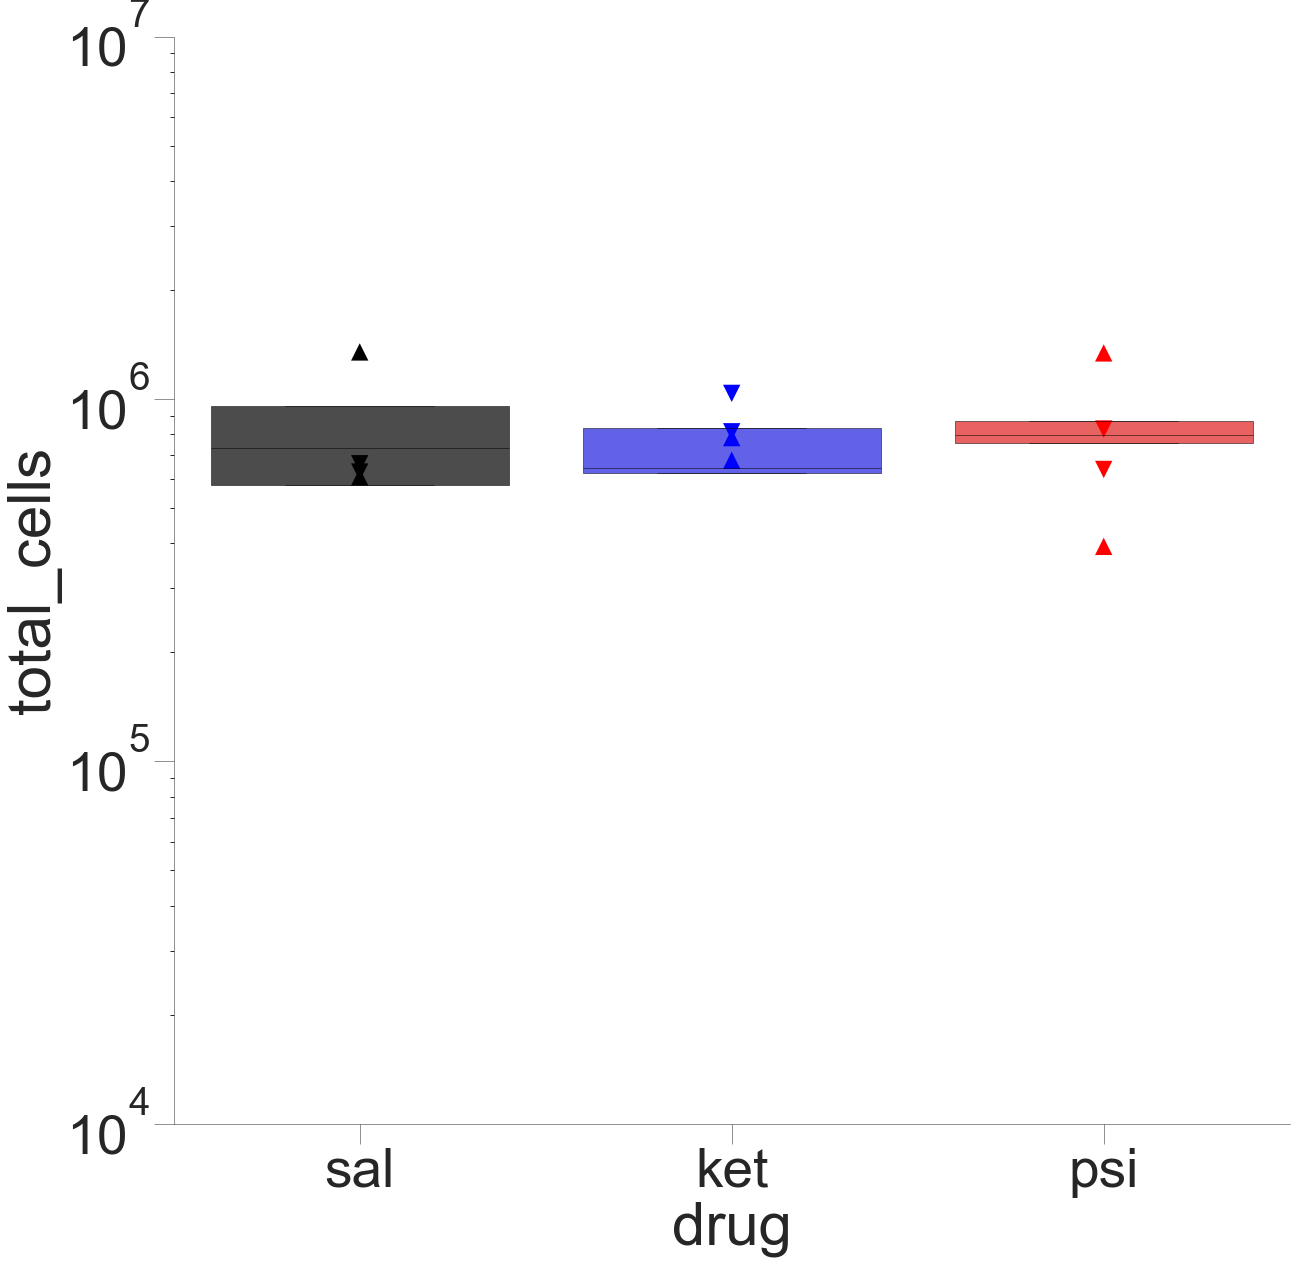

In [21]:
#first calculate total cells for drug/sex/etc
#lightsheet
lightsheet_whole_brain = lightsheet_data[lightsheet_data['Region Name'] == 'Basic cell groups and regions']
lightsheet_whole_brain.drop(columns=['Region ID', 'Region Name', 'count',], inplace=True)
lightsheet_whole_brain['method'] = 'lightsheet'

#plotting
sns.set(font_scale = 5)
sns.set_style('ticks')
sns.despine()

markers={'f': 'v', 'm': '^'}
plt.figure(figsize=(20,20))
order = ['sal', 'ket', 'psi']

ax = sns.boxplot(x="drug", y="total_cells", data=lightsheet_whole_brain, whis=0, dodge=False, showfliers=False, linewidth=0.5,
                 order = order, hue='drug', hue_order = order, palette=['black','blue','red'])
ax = sns.scatterplot(x="drug", y="total_cells", data=lightsheet_whole_brain,
                   hue='drug', linewidth=0, style='sex', markers=markers,
                   s=300, palette=['black','blue','red'])

#lower opacity
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

    
#remove legend
plt.legend([],[], frameon=False)

#cleanup
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.xaxis.set_tick_params(length=20, width=0.5)
ax.yaxis.set_tick_params(length=20, width=0.5)
ax.set_yscale('log')
ax.set(ylim=(1e4,1e7))
sns.despine()

### Panel J

Stored 'excluded_regions' (DataFrame)


(array([-50.,   0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

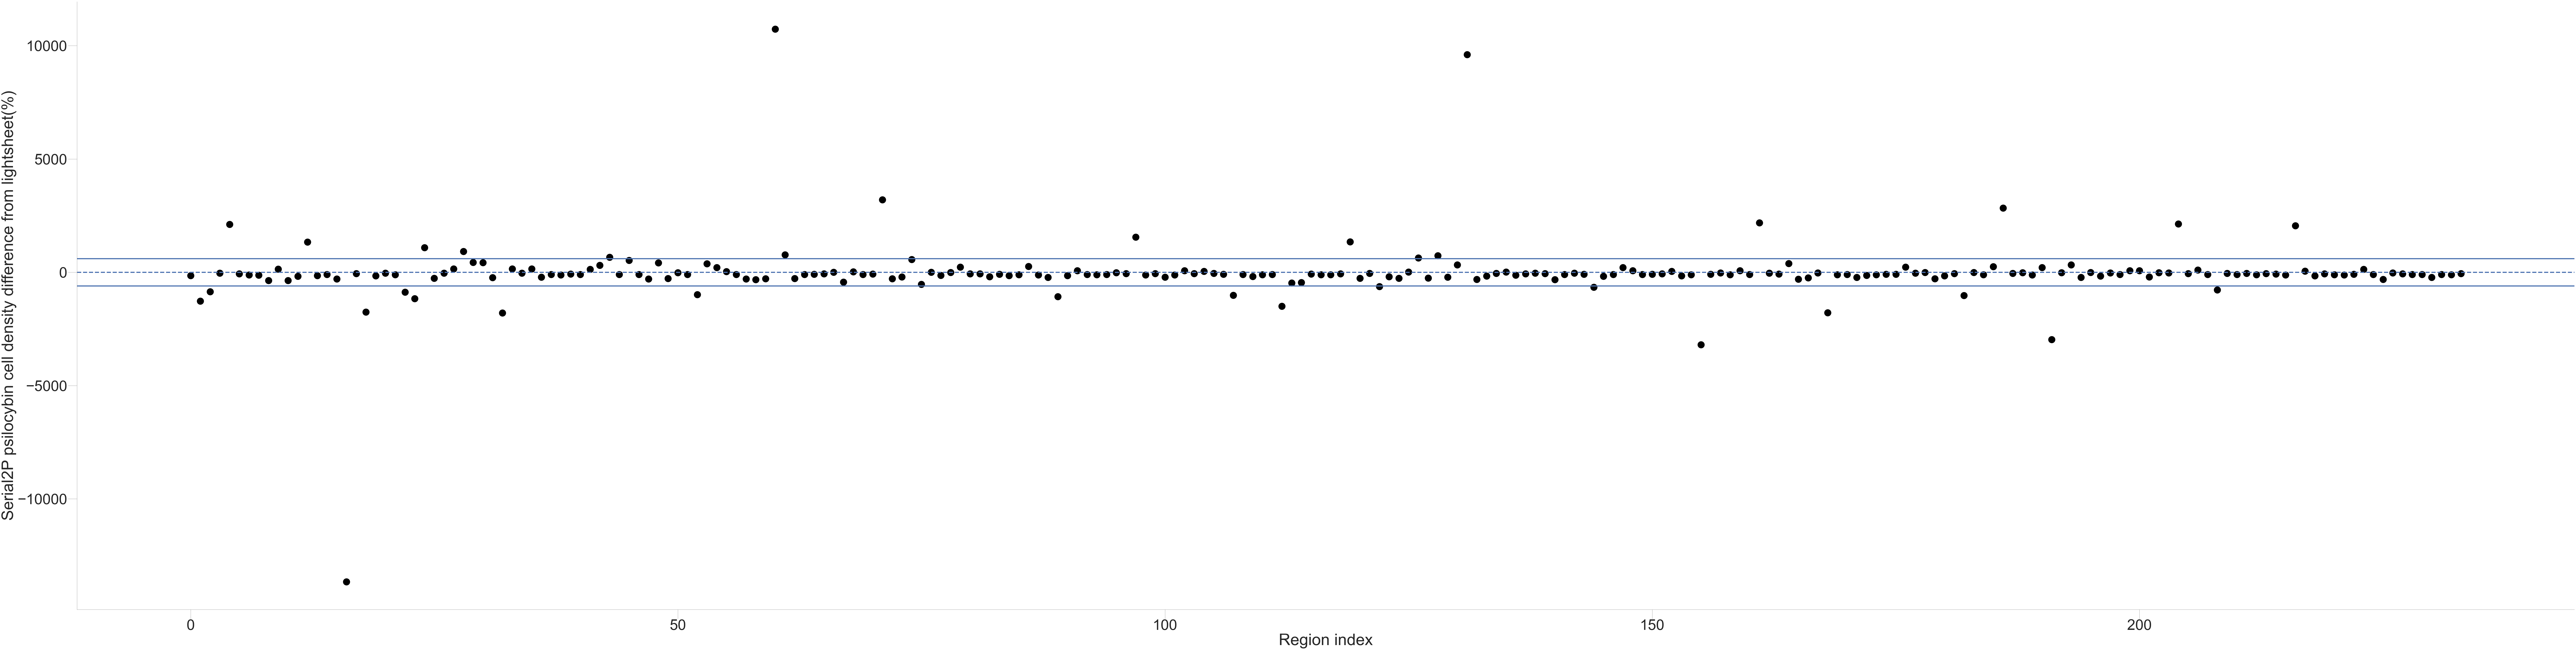

In [43]:
#get data
lightsheet_data_diff = diff_data.loc[diff_data['method'] == 'lightsheet']
serial2p_data_diff = diff_data.loc[diff_data['method'] == 'serial2p']


#rename for ease
lightsheet_diff = lightsheet_data_diff.rename(columns={'psi_ket_cell_density_change':'psi-ket', 'psi_sal_cell_density_change':'psi-sal', 'ket_sal_cell_density_change':'ket-sal'})
s2p_diff = serial2p_data_diff.rename(columns={'psi_ket_cell_density_change':'psi-ket', 'psi_sal_cell_density_change':'psi-sal', 'ket_sal_cell_density_change':'ket-sal'})

s2p_diff_avg = s2p_diff.groupby('Region_Name')['psi-sal','psi-ket','ket-sal'].mean().reset_index()
lightsheet_diff_avg = lightsheet_diff.groupby('Region_Name')['psi-sal','psi-ket','ket-sal'].mean().reset_index()

#s2p_volume_data
s2p_vol = serial2p_data.groupby('Region_Name')['volume_(mm^3)'].mean().reset_index()

#s2p raw saline data
s2p_sal = serial2p_data.loc[serial2p_data['drug'] == 'sal']
s2p_sal = s2p_sal.groupby('Region_Name')['density_(cells/mm^3)'].mean().reset_index()

#LS raw saline data
ls_sal = lightsheet_data.loc[lightsheet_data['drug'] == 'sal']
ls_sal = ls_sal.groupby('Region_Name')['density_(cells/mm^3)'].mean().reset_index()

#plot
#S2P VS LS
#get data and clean up
cell_density = s2p_sal.merge(ls_sal, on='Region_Name')
cell_density.rename(columns={'density_(cells/mm^3)_x':'s2p_saline_density', 'density_(cells/mm^3)_y':'ls_saline_density'}, inplace=True)
percent_change = s2p_diff_avg.merge(lightsheet_diff_avg,on='Region_Name')
percent_change = percent_change[['Region_Name', 'psi-sal_x','psi-sal_y']]
percent_change.rename(columns={'psi-sal_x':'s2p_psi-sal', 'psi-sal_y':'ls_psi-sal'}, inplace=True)

#subtraction / percent change calculate
cell_density['change'] = (cell_density['s2p_saline_density'] - cell_density['ls_saline_density']) / cell_density['ls_saline_density'] * 100
percent_change['change'] = (percent_change['s2p_psi-sal'] - percent_change['ls_psi-sal']) / percent_change['ls_psi-sal'] * 100

#add volume
cell_density = cell_density.merge(s2p_vol, on='Region_Name')
percent_change = percent_change.merge(s2p_vol, on='Region_Name')

#sort on volume
percent_change.sort_values(by='volume_(mm^3)', ascending=True,inplace=True)
cell_density.sort_values(by='volume_(mm^3)', ascending=True,inplace=True)

#get list of regions within limits
excluded_regions = percent_change.loc[(percent_change['change'] <= -600) | (percent_change['change'] >= 600)]
%store excluded_regions
#add regions ids, etc and sort
percent_change['Region_index'] = range(0,0+len(percent_change))

#plot
#setup figure
sns.set(font_scale =6) #or 3
sns.set_style("ticks")
plt.figure(figsize=(200,50))

#subtraction plot
ax = sns.scatterplot(x='Region_index', y='change', data=percent_change, s=1000, linewidth=0, color='black')
ax.axhline(600, lw=5)
ax.axhline(-600, lw=5)
ax.axhline(0, lw=5,ls='--')


#cleanup
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='y', rotation=0)
ax.xaxis.set_tick_params(length=40.5, width=0.5)
ax.yaxis.set_tick_params(length=40.5, width=0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.set(xlabel='Region index', ylabel='Serial2P psilocybin cell density difference from lightsheet(%)')
sns.despine()

plt.xticks(rotation=0)

### Panel K

(-600.0, 600.0)

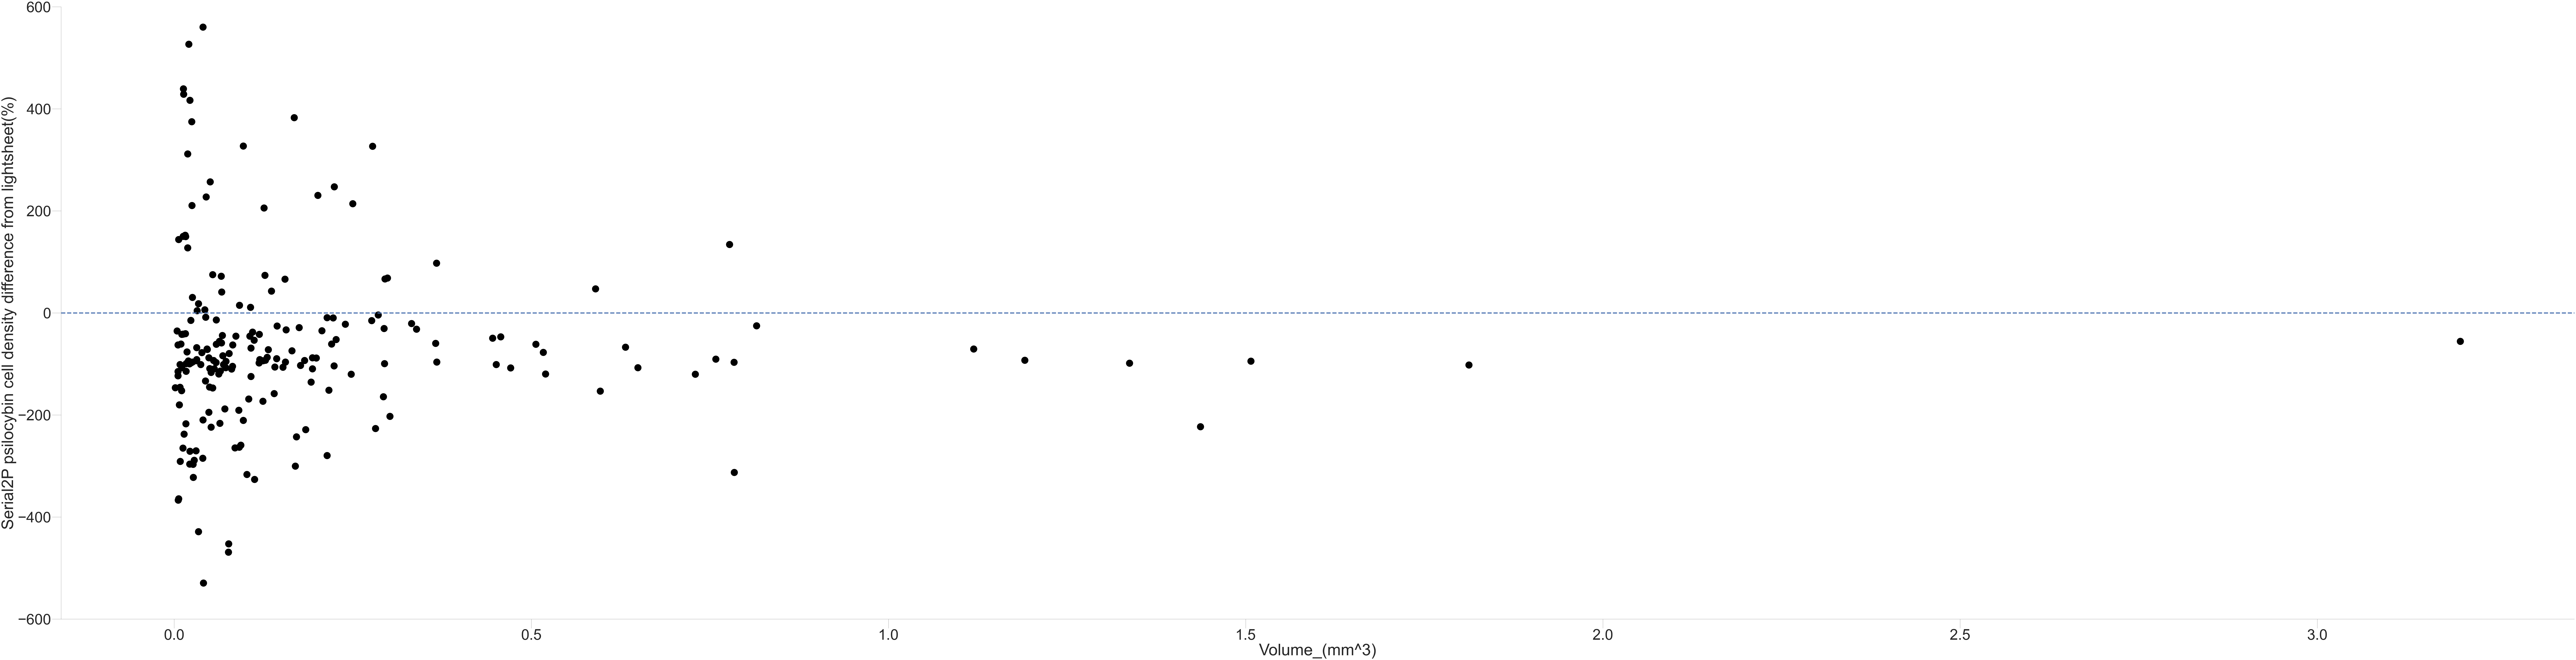

In [42]:
#plot
#setup figure
sns.set(font_scale =6) #or 3
sns.set_style("ticks")
plt.figure(figsize=(200,50))

#subtraction plot
ax = sns.scatterplot(x='volume_(mm^3)', y='change', data=percent_change, s=1000, linewidth=0, color='black')
ax.axhline(0, lw=5,ls='--')


#cleanup
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='y', rotation=0)
ax.xaxis.set_tick_params(length=40.5, width=0.5)
ax.yaxis.set_tick_params(length=40.5, width=0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.set(xlabel='Volume_(mm^3)', ylabel='Serial2P psilocybin cell density difference from lightsheet(%)')
sns.despine()

plt.xticks(rotation=0)
plt.ylim(-600,600)